In [1]:
import pandas as pd
import numpy as np

In [2]:
h=pd.read_csv("C:/Users/harik/Downloads/heart.csv")

In [3]:
h.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
h.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
h.shape

(918, 12)

In [6]:
#Data Cleaning-Clean data
h.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
#Duplicate_values-no duplicate values
h.duplicated().sum()

0

C:\Users\harik\AppData\Local\Temp\ipykernel_30096\3120524914.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(h['RestingBP'])
C:\Users\harik\AppData\Local\Temp\ipykernel_30096\3120524914.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(h['Cholesterol'])
C:\Users\harik\AppData\Local\Temp\ip

<Axes: xlabel='MaxHR', ylabel='Density'>

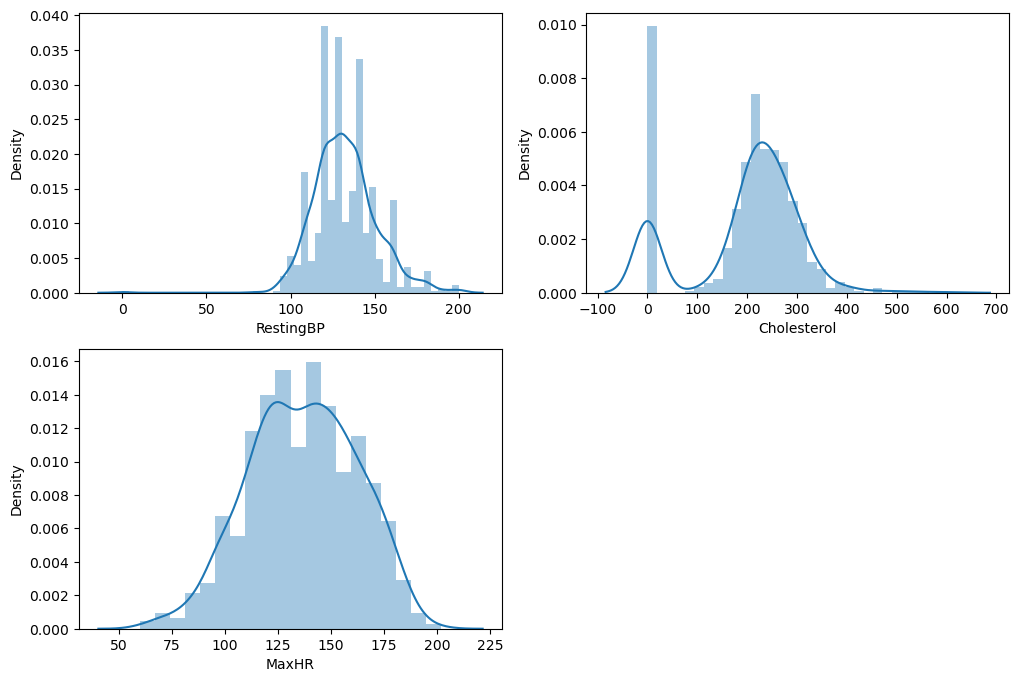

In [8]:
#outlier analysis
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(h['RestingBP'])
plt.subplot(2,2,2)
sns.distplot(h['Cholesterol'])
plt.subplot(2,2,3)
sns.distplot(h['MaxHR'])

In [10]:
#first plot  for RestingBP its a normal distribution
mean=h['RestingBP'].mean()
std=h['RestingBP'].std()

In [11]:
#Finding the lowest and highest range for resting bp
highest_allowed=mean+(3*std)
lowest_allowed=mean-(3*std)

In [12]:
#finding the mean and standard deviation for resting bp
print("mean=",mean," ","std=",std)
print("highest_allowed=",highest_allowed," ","lowest_allowed=",lowest_allowed)

mean= 132.39651416122004   std= 18.514154119907808
highest_allowed= 187.93897652094347   lowest_allowed= 76.85405180149661


In [13]:
#finding mean and standard deviation of cholesterol its a normal distribution
mean=h['Cholesterol'].mean()
std=h['Cholesterol'].std()

In [14]:
#range of cholestrol ranges to find outliers
highest_allowed=mean+(3*std)
lowest_allowed=mean-(3*std)

In [15]:
print("mean=",mean," ","std=",std)
print("highest_allowed=",highest_allowed," ","lowest_allowed=",lowest_allowed)

mean= 198.7995642701525   std= 109.38414455220337
highest_allowed= 526.9519979267626   lowest_allowed= -129.35286938645763


In [16]:
##range of MaxHR ranges to find outliers
highest_range=h['MaxHR']*0.98
lowest_range=h['MaxHR']*0.02

In [17]:
q1=h['MaxHR'].quantile(0.25)
q2=h['MaxHR'].quantile(0.50)
q3=h['MaxHR'].quantile(0.75)
iqr=q3-q1
lowest_range=q1-(iqr*1.5)
highest_range=q3+(1.5*iqr)

In [18]:
print(lowest_range,highest_range)

66.0 210.0


In [19]:
h[(h['MaxHR']>highest_range) |(h['MaxHR']<lowest_range)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
370,60,M,ASY,135,0,0,Normal,63,Y,0.5,Up,1
390,51,M,ASY,140,0,0,Normal,60,N,0.0,Flat,1


In [20]:
h[(h['RestingBP']<lowest_allowed) | (h['RestingBP']>highest_allowed)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


1.All these above information are not considered to be outliers because these are the important information where resting BP is higher and heart diseases are positive
2.Cholestrol distribution also is not indicating any presence of outliers because there are scenarios where cholestrol levels are 0 and the optimal range of cholestrol ideally above 60 is good,below 100 is bad,less than 200mg is normal and 200-240 is boderline high,above that is high,600 is very high
3.Heart rate 60-100 is optimal,above 125 is danger and above 175 emergency

# EDA

<Axes: xlabel='Age', ylabel='Cholesterol'>

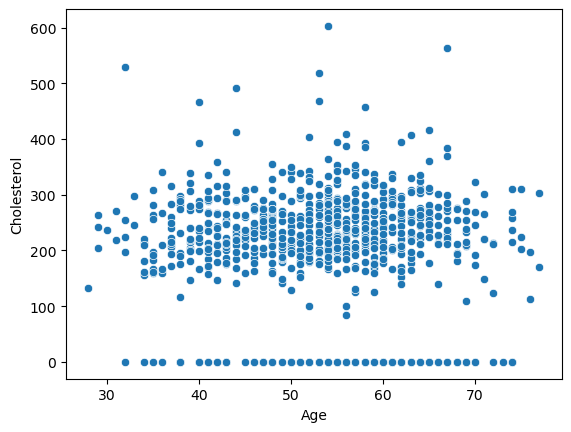

In [21]:
#Analyzing which age of people are suffering from cholestrol
import seaborn as sns
sns.scatterplot(data=h,x='Age',y='Cholesterol')

C:\Users\harik\AppData\Local\Temp\ipykernel_30096\1244445816.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(h['Age'],color='blue')


<Axes: xlabel='Age', ylabel='Density'>

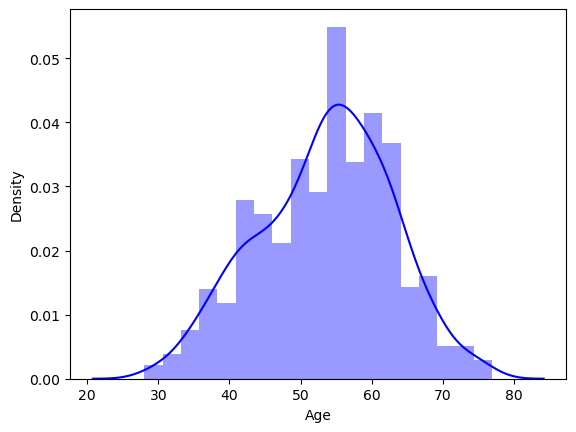

In [22]:
#Distribution plot of age
sns.distplot(h['Age'],color='blue')

<Axes: xlabel='Sex', ylabel='HeartDisease'>

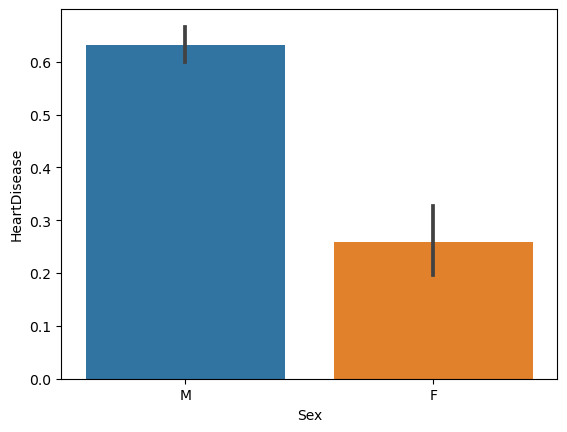

In [23]:
#sex was heartdiseases
sns.barplot(data=h,x="Sex",y="HeartDisease")

<Axes: xlabel='ChestPainType'>

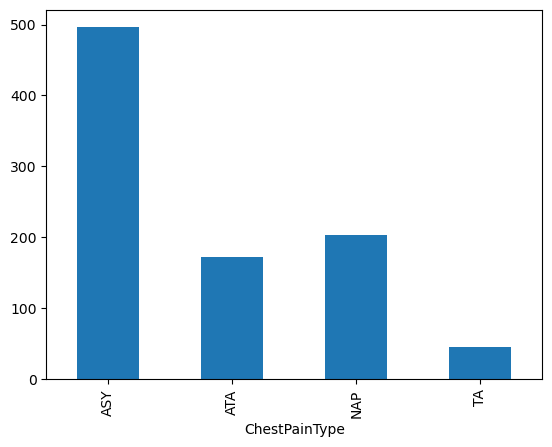

In [24]:
#Chestpain type wrt sex
h.groupby('ChestPainType')['Sex'].count().plot(kind='bar',stacked=True)

In [25]:
#data is not balanced the results might be biased as there are more men than women 
h.groupby('Sex').size()

Sex
F    193
M    725
dtype: int64

<Axes: >

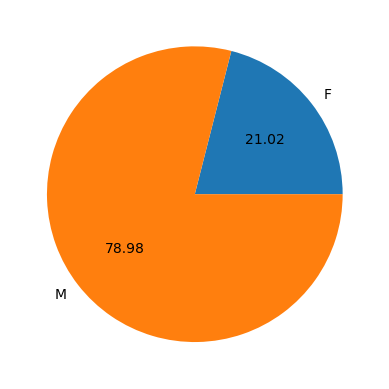

In [26]:
#finding number of male and female
h.groupby('Sex').size().plot(kind="pie",autopct="%.2f")

As the data is unbalanced we can balance the data using various techniques like synthetic data addition techniques like SMOTE

<Axes: >

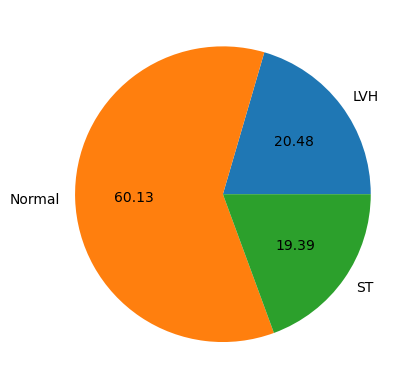

In [27]:
#Resting ECG values
h.groupby('RestingECG').size().plot(kind="pie",autopct="%.2f")

<Axes: >

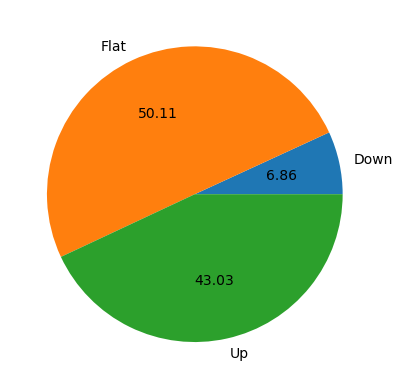

In [28]:
#ST_slope of observations
h.groupby('ST_Slope').size().plot(kind="pie",autopct="%.2f")

<Axes: >

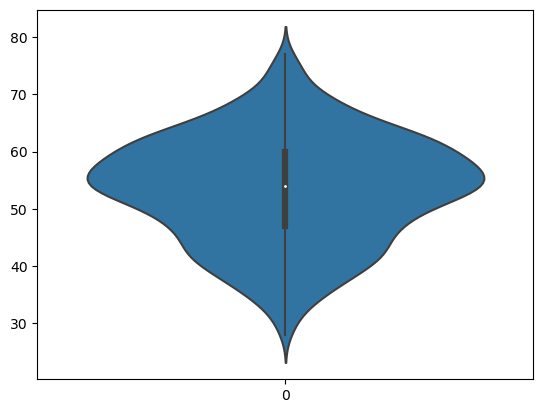

In [29]:
sns.violinplot(h['Age'])

<Axes: xlabel='Sex', ylabel='HeartDisease'>

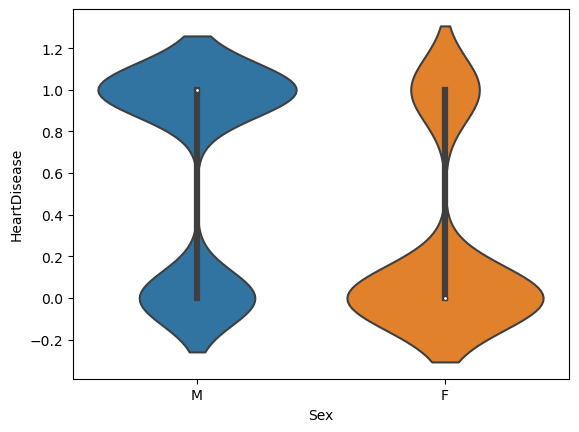

In [30]:
sns.violinplot(x=h['Sex'],y=h['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Age'>

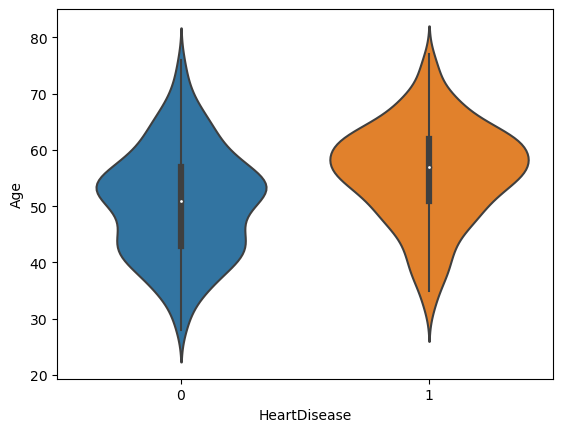

In [31]:
sns.violinplot(y=h['Age'],x=h['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='RestingBP'>

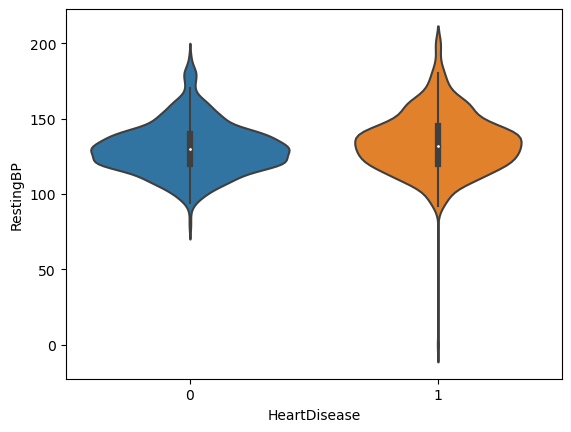

In [32]:
sns.violinplot(y=h['RestingBP'],x=h['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

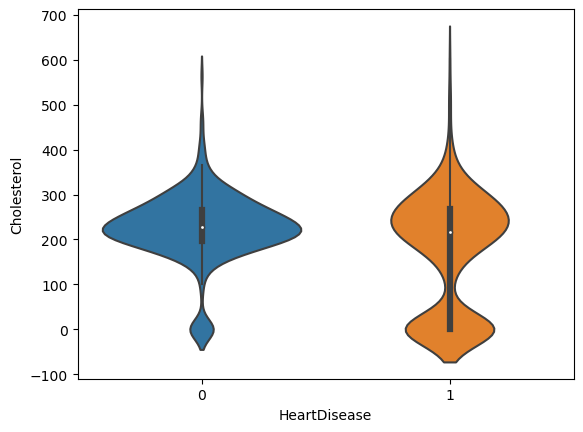

In [33]:
sns.violinplot(y=h['Cholesterol'],x=h['HeartDisease'])

In [35]:
#finding the correlation between the columsn'
h.corr()

C:\Users\harik\AppData\Local\Temp\ipykernel_30096\2197191701.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  h.corr()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


from the above correlation we can find that each and every columns is least dependent on each other as the value is not near to 0.7.The positive correlation indicates the columns value increases wrt to other whereas the negative correlatio indicates the decrease in the value as other column value increases

C:\Users\harik\AppData\Local\Temp\ipykernel_30096\1918162179.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(h.corr())


<Axes: >

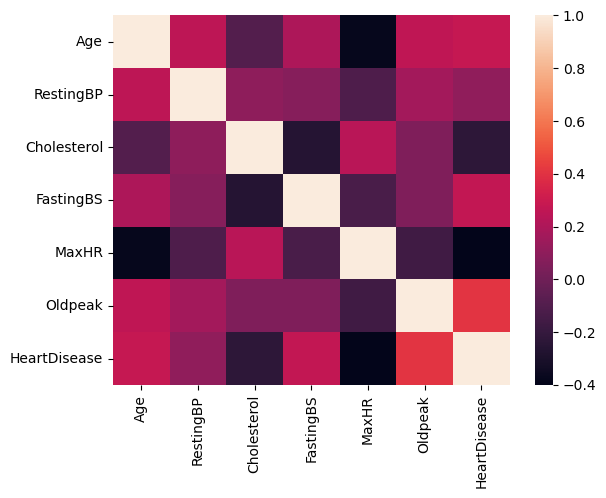

In [37]:
#plotting the heatmap
sns.heatmap(h.corr())

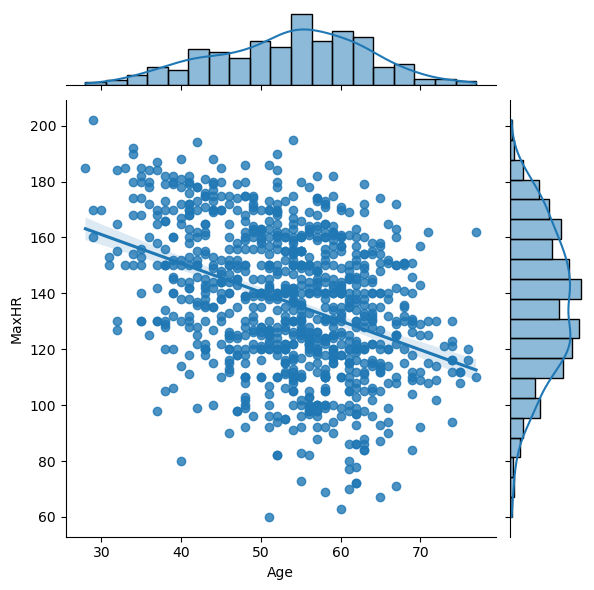

In [39]:
#jointplot between age and maximum HR
sns.jointplot(x='Age',y='MaxHR',data=h,kind='reg')

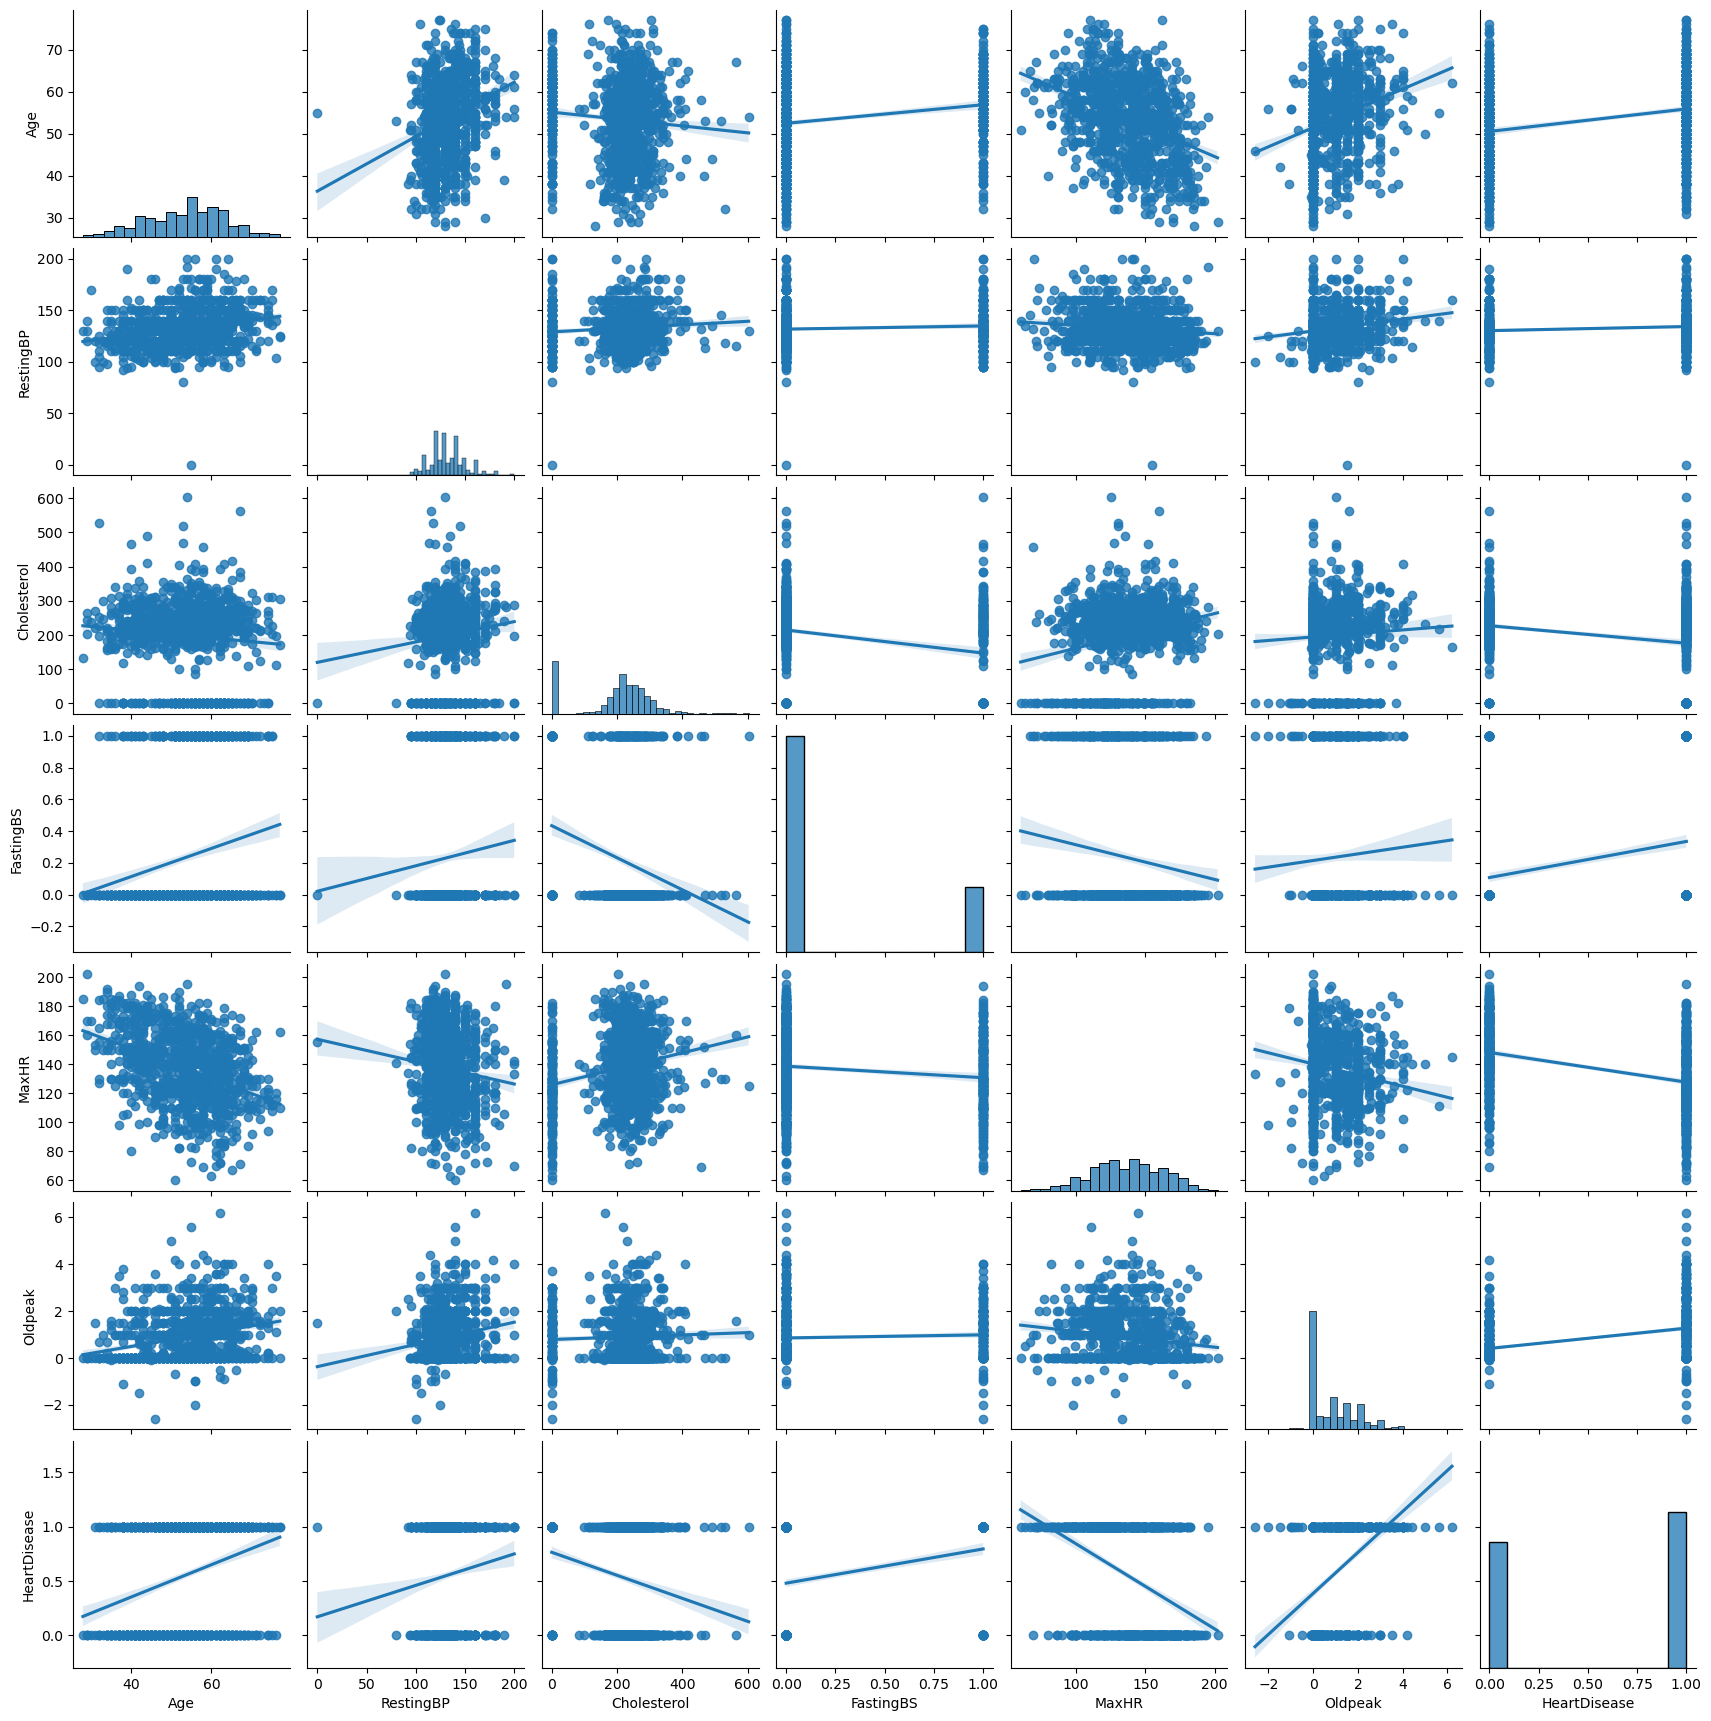

In [42]:
sns.pairplot(h,kind='reg')